In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#соедними все полученные таблицы в одну и выведем лишь признак, который нам нужен, в случае OG возьмем не средневзвешенную
#а расчётную цену, так мы сразу избавимся от пропусков.В дальнейших версиях проекта мы планируем заменить OG на другой индекс.
df_Si=pd.read_csv('Si_okt-may_v2.csv')
df_main=df_Si[["Дата","Кодфьючерса","Средне-взвешеннаяцена за лот"]]
df_main["Кодфьючерса"]=df_main["Кодфьючерса"].str[:2]
df_main=df_main.rename(columns={"Дата":"Дата торгов","Кодфьючерса":"Код инструмента","Средне-взвешеннаяцена за лот":"Срвзв.цена"})
df_SBER=pd.read_csv('SBER_okt-may_v2.csv')
df_main=pd.concat([df_main,df_SBER[["Дата торгов","Код инструмента","Срвзв.цена"]]])
df_OG=pd.read_csv('OG_okt-may_v2.csv')
df_OG["Кодфьючерса"]=df_OG["Кодфьючерса"].str[:2]
del df_OG['Средне-взвешеннаяцена за лот']
df_OG=df_OG.rename(columns={"Дата":"Дата торгов","Кодфьючерса":"Код инструмента","Расчетнаяцена":"Срвзв.цена"})
df_main=pd.concat([df_main,df_OG[["Дата торгов","Код инструмента","Срвзв.цена"]]])
df_SNGS=pd.read_csv('SNGS_okt-may_v2.csv')
df_main=pd.concat([df_main,df_SNGS[["Дата торгов","Код инструмента","Срвзв.цена"]]])

C:\Users\0D04~1\AppData\Local\Temp/ipykernel_3824/1382379524.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main["Кодфьючерса"]=df_main["Кодфьючерса"].str[:2]


In [4]:
df_main

,Дата торгов,Код инструмента,Срвзв.цена
0,2022-10-03,Si,57876.000
1,2022-10-04,Si,58227.000
2,2022-10-05,Si,58968.000
3,2022-10-06,Si,59710.000
4,2022-10-07,Si,60093.000
...,...,...,...
141,2023-04-24,SNGS,26.075
142,2023-04-25,SNGS,25.750
143,2023-04-26,SNGS,25.295
144,2023-04-27,SNGS,25.375


In [5]:
#аггрегируем таблицу по дате и коду инструмента, выведем получившуюся таблицу
df_info=pd.pivot(df_main,index='Дата торгов',columns='Код инструмента',values='Срвзв.цена')
df_info

Код инструмента,OG,SBER,SNGS,Si
Дата торгов,,,,
2022-10-03,5554.0,111.96,18.480,57876.0
2022-10-04,5365.0,112.14,18.790,58227.0
2022-10-05,5365.0,108.13,18.750,58968.0
2022-10-06,5367.0,108.81,18.830,59710.0
2022-10-07,5300.0,105.08,18.055,60093.0
...,...,...,...,...
2023-04-24,6850.0,235.30,26.075,80303.0
2023-04-25,6850.0,235.02,25.750,80570.0
2023-04-26,6850.0,235.41,25.295,80604.0


In [6]:
#отскалируем данные в полученной таблице
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df_info.copy()
df_scaled['OG'] = scaler.fit_transform(df_scaled[['OG']])
df_scaled['SBER'] = scaler.fit_transform(df_scaled[['SBER']])
df_scaled['SNGS'] = scaler.fit_transform(df_scaled[['SNGS']])
df_scaled['Si'] = scaler.fit_transform(df_scaled[['Si']])
df_scaled

Код инструмента,OG,SBER,SNGS,Si
Дата торгов,,,,
2022-10-03,-0.827110,-1.297169,-2.267131,-1.602007
2022-10-04,-1.310265,-1.292165,-2.081439,-1.553477
2022-10-05,-1.310265,-1.403651,-2.105399,-1.451026
2022-10-06,-1.305152,-1.384746,-2.057479,-1.348435
2022-10-07,-1.476429,-1.488447,-2.521708,-1.295481
...,...,...,...,...
2023-04-24,2.485952,2.131940,2.282311,1.498786
2023-04-25,2.485952,2.124155,2.087634,1.535702
2023-04-26,2.485952,2.134998,1.815087,1.540403


In [68]:
#найдем корреляцию: нас интересует корреляция SNGS с остальными.
df_info.corr()

Код инструмента,OG,SBER,SNGS,Si
Код инструмента,,,,
OG,1.000000,0.810881,0.785921,0.613254
SBER,0.810881,1.000000,0.885845,0.912607
SNGS,0.785921,0.885845,1.000000,0.793768
Si,0.613254,0.912607,0.793768,1.000000


Заметим, что наблюдается сильная прямая линейная связь. Давайте теперь рассмотрим её на графиках.

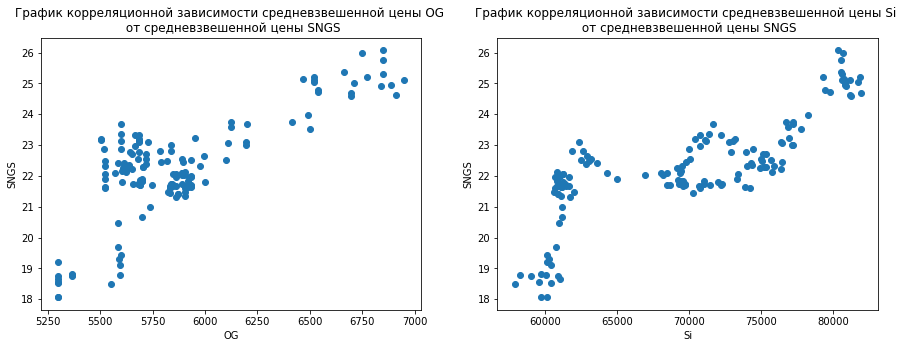

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))


ax[0].scatter(df_info['OG'], df_info['SNGS'])
ax[0].set_xlabel('OG')
ax[0].set_ylabel('SNGS')
ax[0].set_title("График корреляционной зависимости средневзвешенной цены OG \n от средневзвешенной цены SNGS")
ax[1].scatter(df_info['Si'], df_info['SNGS'])
ax[1].set_xlabel('Si')
ax[1].set_ylabel('SNGS')
ax[1].set_title("График корреляционной зависимости средневзвешенной цены Si \n от средневзвешенной цены SNGS")

plt.show()


Text(0.5, 1.0, 'График корреляционной зависимости средневзвешенной цены SBER \n от средневзвешенной цены SNGS')

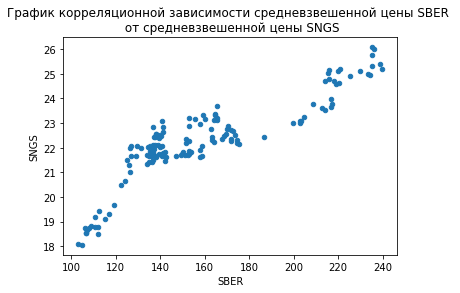

In [13]:
df_info.plot.scatter(x='SBER',y='SNGS')
plt.title("График корреляционной зависимости средневзвешенной цены SBER \n от средневзвешенной цены SNGS")

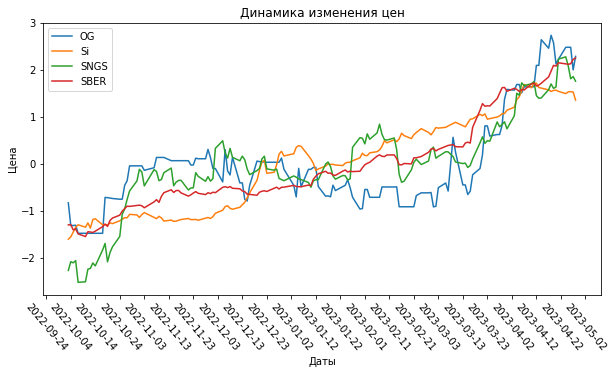

In [98]:
#теперь построим графики динамики изменения цен наших инструментов. Перед этим раделим наши даты на интервалы 10 дней для удобства восприятия оси х
import matplotlib.dates as mdates
import datetime
dates = [datetime.datetime.strptime(d, "%Y-%m-%d").date() for d in df_main['Дата торгов'].unique()]
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(dates, df_scaled.OG, label='OG')
ax.plot(dates, df_scaled.Si, label='Si')
ax.plot(dates, df_scaled.SNGS, label='SNGS')
ax.plot(dates, df_scaled.SBER, label='SBER')
ax.legend()
ax.set_title('Динамика изменения цен')
ax.set_xlabel('Даты')
ax.set_ylabel('Цена')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=-50)
plt.show()


Заметим, что цены всех инструментов двигались примерно одинаково. Это так же может говорить нам о присутствии связи между ними.